# Evaluation against our own measurements
This notebook compares the measurements we have taken of dihedral reflectors (using our `cad/office` measurement setup) with our simulations thereof.

In [1]:
# import libraries for numeric computations and plotting
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# helper functions for parsing data from our simulations and measurements

def load_data_full(path):
    """Loads a binary radar cube file. It is assumed that the radar cube has
    256 samples per chirp, 128 chirps, 4 receive channels and is stored in
    frequency domain."""
    data = np.fromfile(path, np.complex64).reshape((-1, 128, 256, 4))
    
    # since our scene is static, we can get rid of everything except chirp #0
    # (velocity = 0)
    # since we do not have any important angular dependency, we can also get rid of
    # the everything except channel #0 (sum over all channels)
    data = data[:,0,:,0].transpose()
    return data

def load_data(path):
    """Loads a binary radar cube file that has been compressed."""
    data = np.fromfile(path, np.complex64).reshape((-1, 256))
    return data.transpose()

def plot(name, simulation=False, idx=20, **kwargs):
    data = load_data(name)
    if simulation:
        # note that the scale of our simulation needs to be calibrated to the sensor:
        # there are many sensor-dependent steps in the sensors pipeline that perform
        # some kind of gain of the signal which we cannot account for in the simulation
        data /= 9.2
    
    if not simulation:
        x = 53.8 * np.linspace(+1, -1, data.shape[1]) - 2.8
    else:
        x = np.linspace(-75, +75, data.shape[1])
    
    # plot the data on logarithmic scale
    plt.semilogy(x, np.abs(data[idx,:]), label=name, **kwargs)

def finish_plot():
    plt.grid(which='both')
    plt.gca().set_xticks(np.arange(-50, 50+1, 5))
    plt.xlim(-50, +50)
    plt.xlabel("Angle [°]")
    plt.ylabel("Signal strength")
    plt.legend()
    plt.show()

## Overview over measurements
We have measured dihedral reflectors of four different edge lengths: 5cm, 7cm, 10cm and 15cm.  
The results of our measurements are summarized in the figure below.

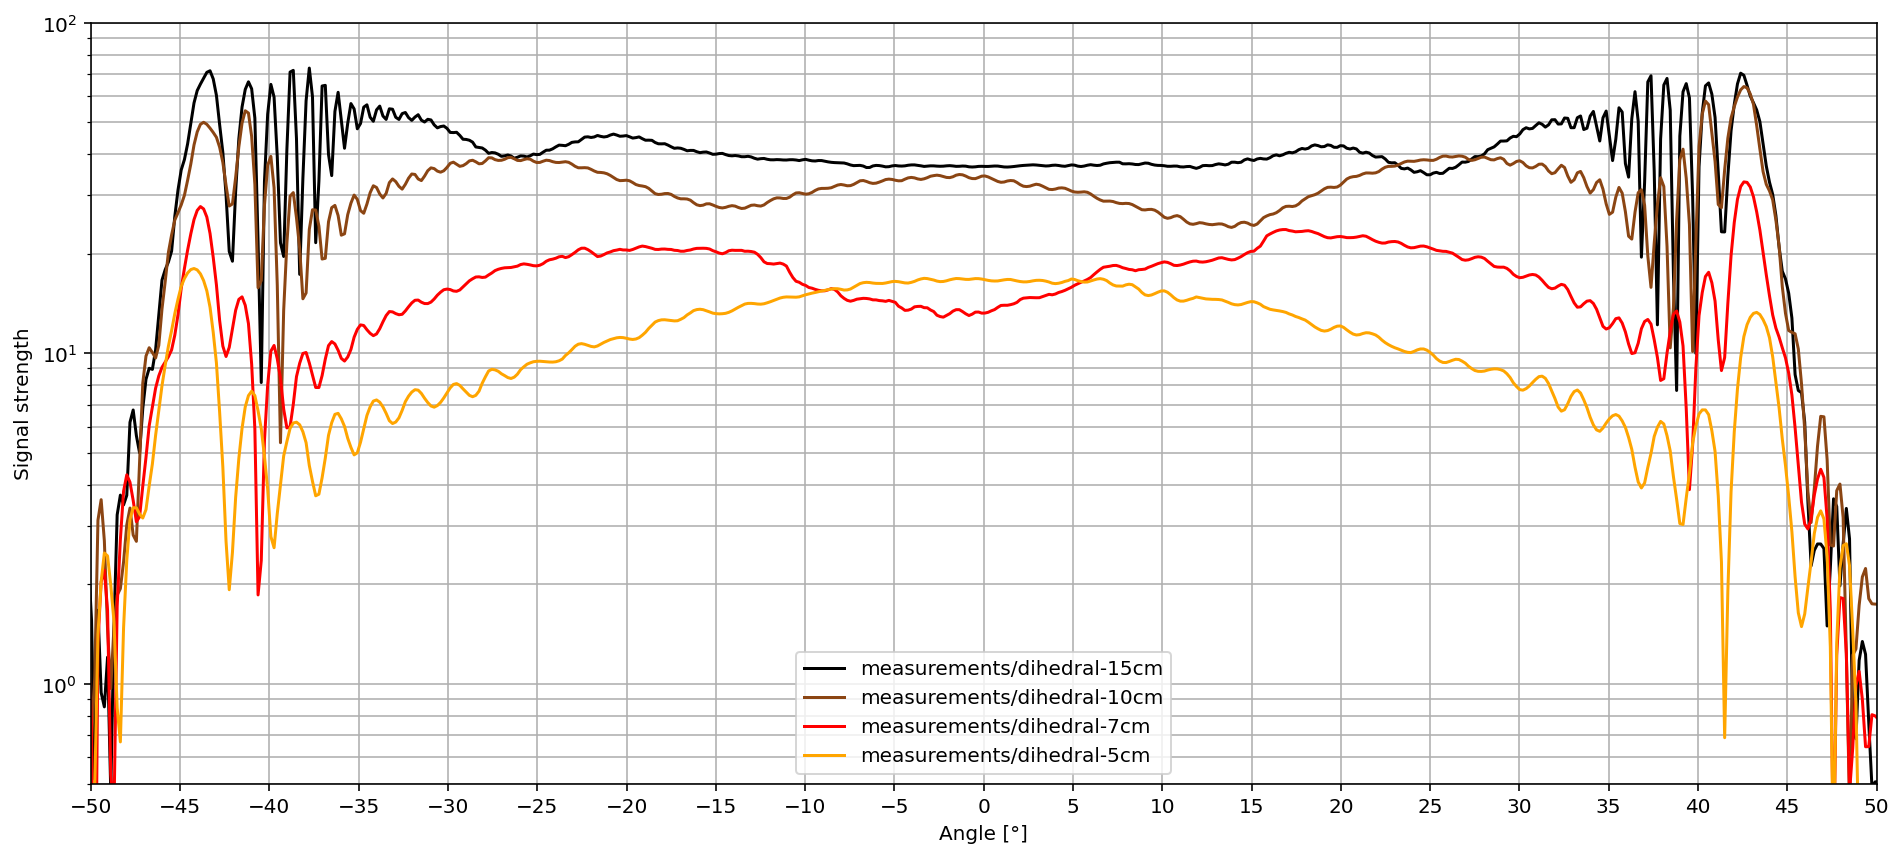

In [3]:
plt.figure(figsize=(16,7))
plot("measurements/dihedral-15cm", c="k")
plot("measurements/dihedral-10cm", c="saddlebrown")
plot("measurements/dihedral-7cm" , c="r")
plot("measurements/dihedral-5cm" , c="orange")
plt.ylim(5e-1, 1e+2)
finish_plot()

## Overview over simulations
Our simulations tend to show good agreement with our measurements. There are some interesting differences, however:

* Our algorithm predicts higher backscatter than measured for the 7cm and the 10cm reflector
* Our algorithm also predicts more fluctuations between -30° and +30° for the 15cm reflector

It is unclear to what degree these differences stem from inaccuracies in our algorithm or from imprecision in our measurements.
We are currently planning on doing more precise measurements in a anechoic chambers with proper positioners.

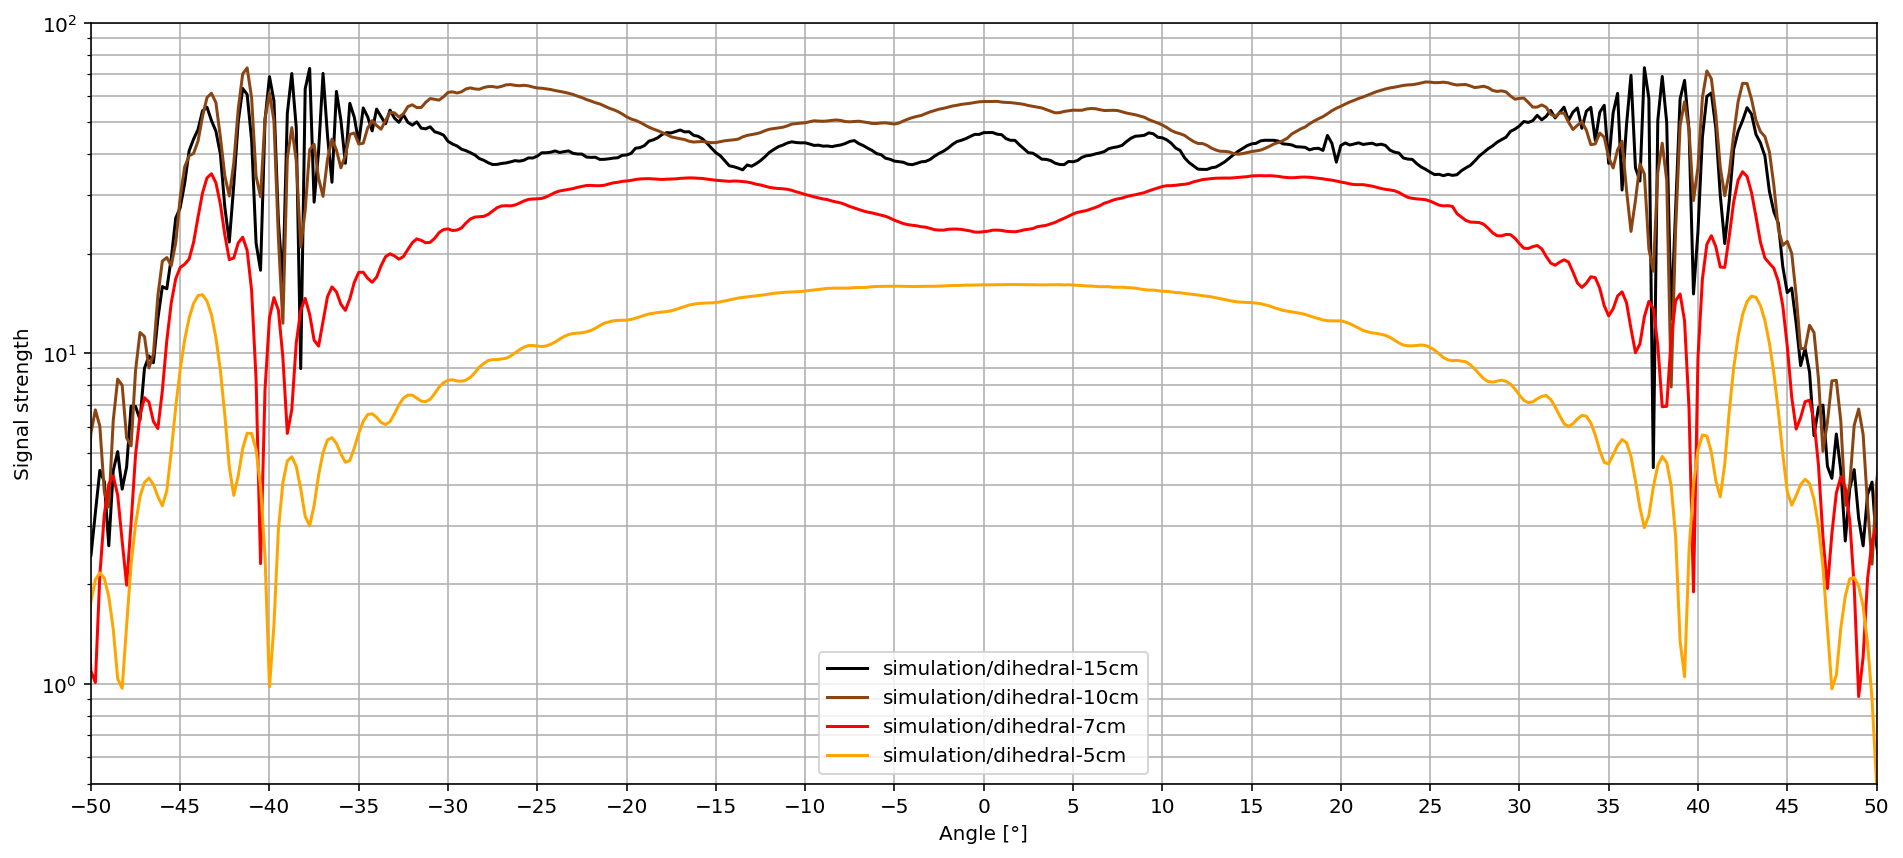

In [4]:
plt.figure(figsize=(16,7))
plot("simulation/dihedral-15cm", simulation=True, c="k")
plot("simulation/dihedral-10cm", simulation=True, c="saddlebrown")
plot("simulation/dihedral-7cm" , simulation=True, c="r")
plot("simulation/dihedral-5cm" , simulation=True, c="orange")
plt.ylim(5e-1, 1e+2)
finish_plot()

# 5cm dihedral reflector

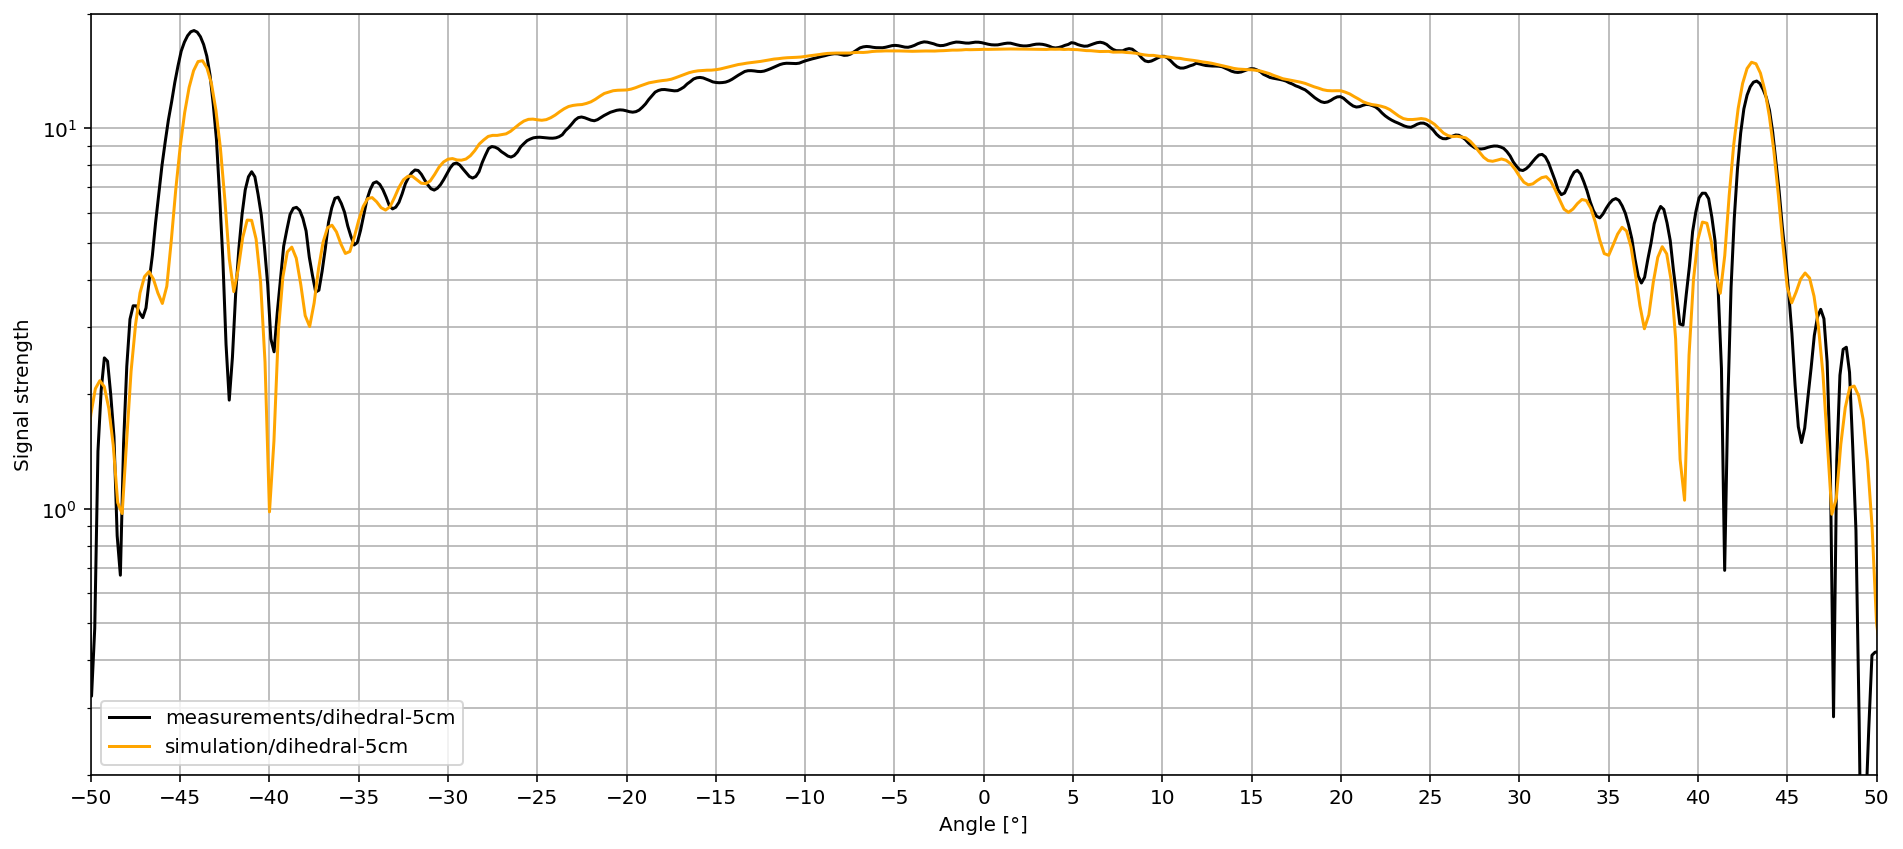

In [5]:
plt.figure(figsize=(16,7))
plot("measurements/dihedral-5cm", c="k")
plot("simulation/dihedral-5cm"  , simulation=True, c="orange")
plt.ylim(2e-1, 2e+1)
finish_plot()

# 7cm dihedral reflector

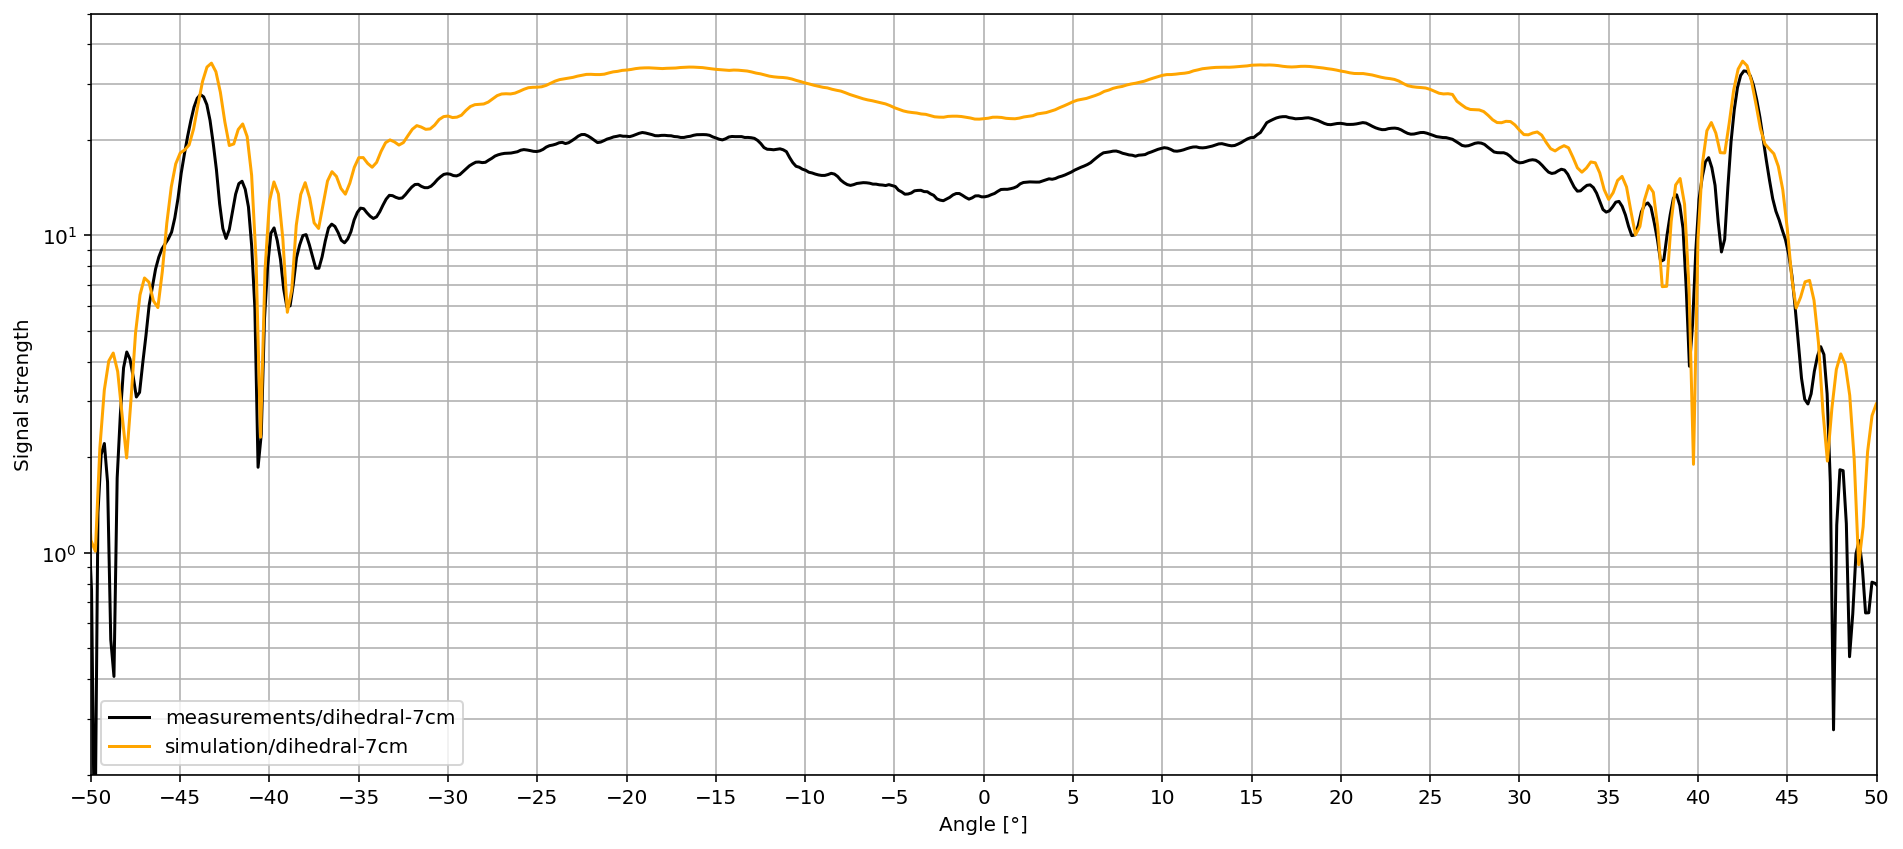

In [6]:
plt.figure(figsize=(16,7))
plot("measurements/dihedral-7cm", c="k")
plot("simulation/dihedral-7cm"  , simulation=True, c="orange")
plt.ylim(2e-1, 5e+1)
finish_plot()

# 10cm dihedral reflector

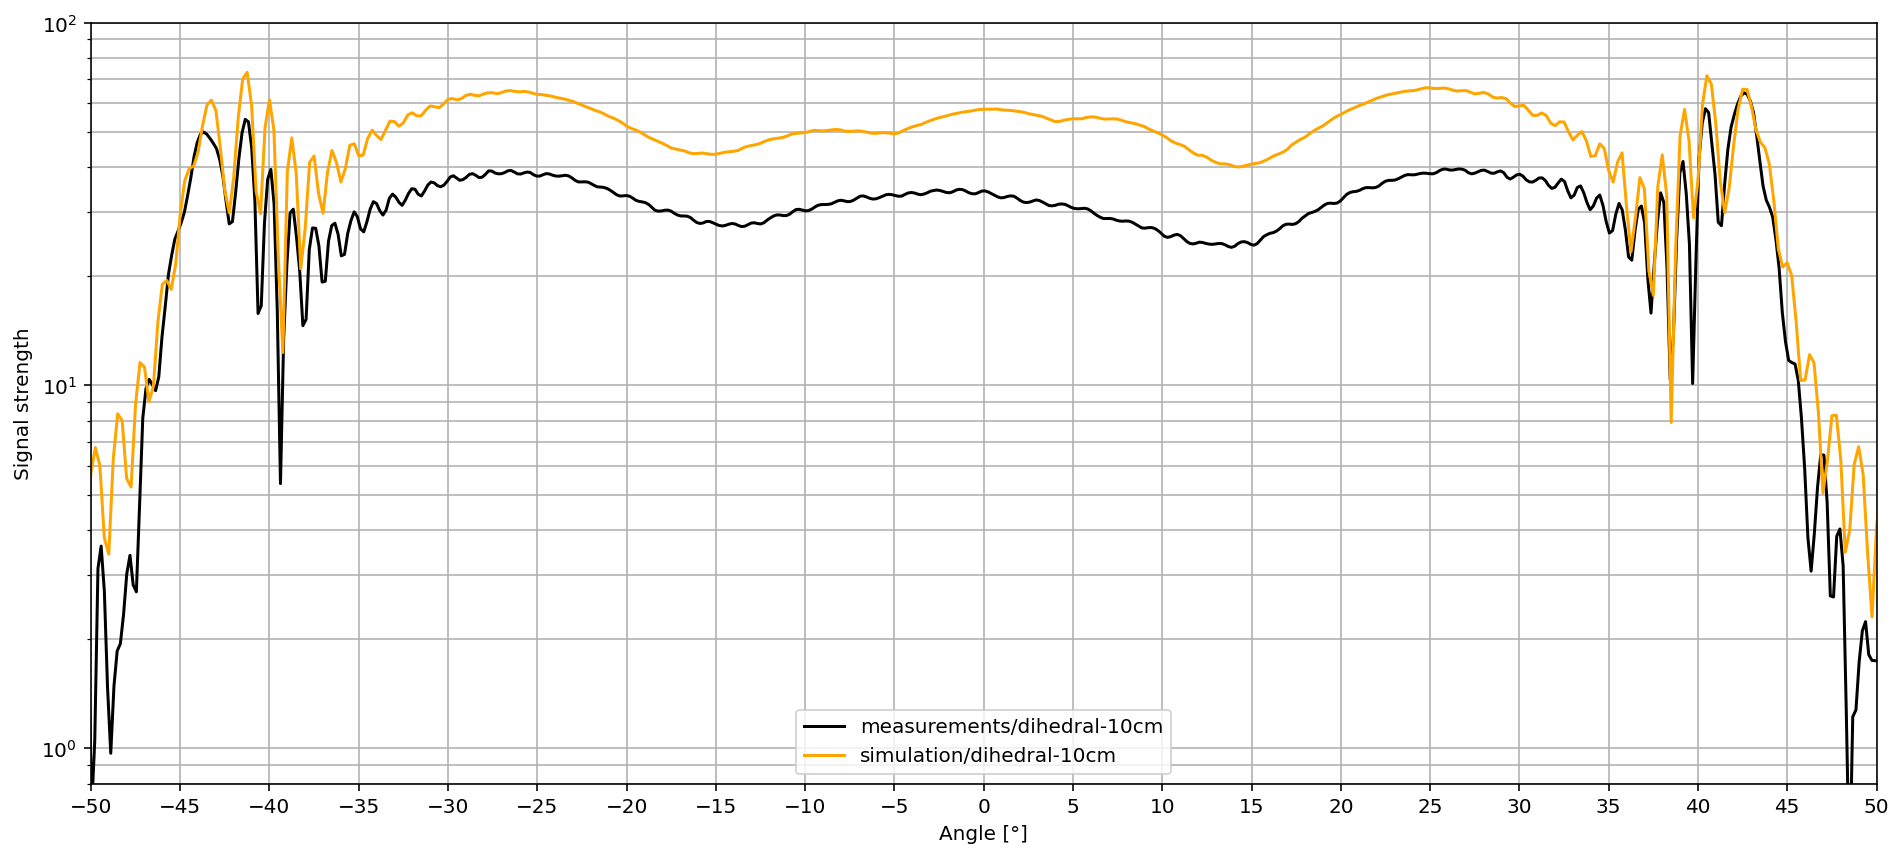

In [7]:
plt.figure(figsize=(16,7))
plot("measurements/dihedral-10cm", c="k")
plot("simulation/dihedral-10cm"  , simulation=True, c="orange")
plt.ylim(8e-1, 1e+2)
finish_plot()

# 15cm dihedral reflector

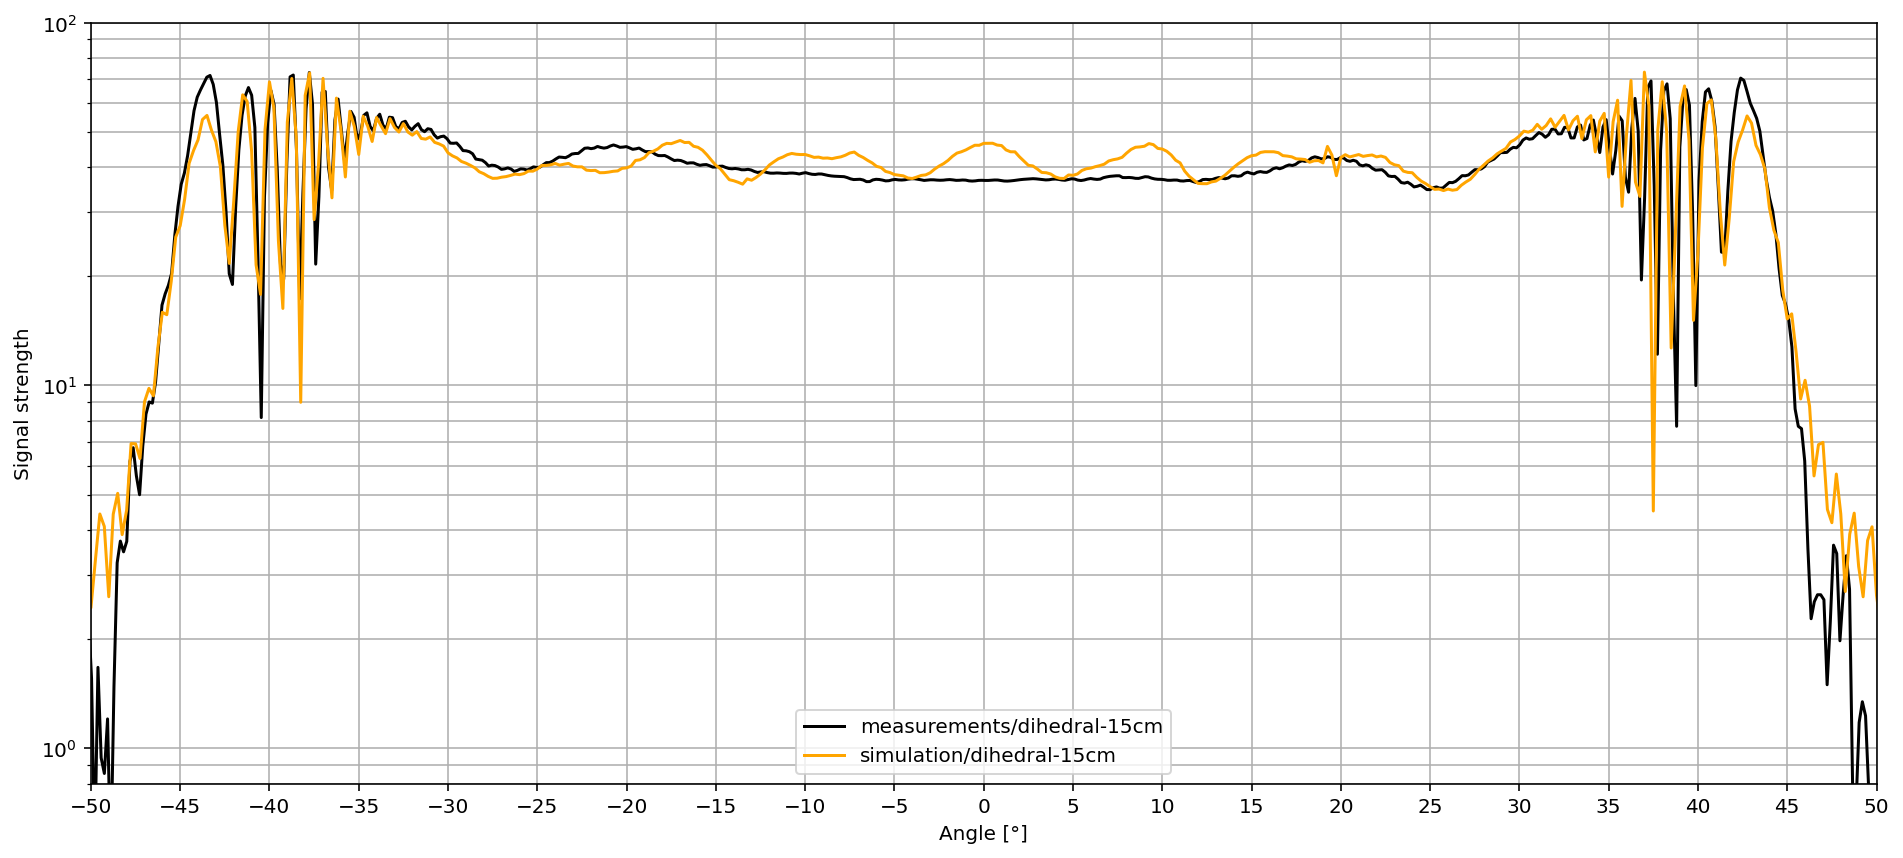

In [8]:
plt.figure(figsize=(16,7))
plot("measurements/dihedral-15cm", c="k")
plot("simulation/dihedral-15cm"  , simulation=True, c="orange")
plt.ylim(8e-1, 1e+2)
finish_plot()